## What was the effect of lockdown on bicycle usage in Edinburgh? 

You might answer this question in terms of the **number of trips**, **popular stations** or **popular hire times**. You might want to consider how to <u>make your comparisons between pandemic and pre-pandemic fair</u> and to <u>think about how confident we can be about the size of any effects observed.</u>

In [2]:
import os
import sys
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy
from scipy.stats import norm
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data_2018_loc = os.path.join(os.getcwd(), 'data', '2018-data.csv')
data_2019_loc = os.path.join(os.getcwd(), 'data', '2019-data.csv')
data_2020_loc = os.path.join(os.getcwd(), 'data', '2020-data.csv')
data_2021_loc = os.path.join(os.getcwd(), 'data', '2021-data.csv')
data_2018 = pd.read_csv(data_2018_loc)
data_2019 = pd.read_csv(data_2019_loc)
data_2020 = pd.read_csv(data_2020_loc)
data_2021 = pd.read_csv(data_2021_loc)
data_2021

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2021-01-01 00:48:42.884000+00:00,2021-01-01 00:52:04.432000+00:00,201,1024,Meadow Place,End of Meadow Place,55.940237631689435,-3.194640214184801,265,Meadows East,Between Melville Terrace and Sciennes,55.939809466328285,-3.182738850746432
1,2021-01-01 00:52:12.457000+00:00,2021-01-01 01:00:37.449000+00:00,504,265,Meadows East,Between Melville Terrace and Sciennes,55.939809466328285,-3.182738850746432,1818,Dynamic Earth,"Outside Dynamic Earth, Holyrood Road",55.951089465236365,-3.17572460948655
2,2021-01-01 00:55:14.884000+00:00,2021-01-01 01:12:52.893000+00:00,1058,183,Waverley Bridge,near the top of the South ramp,55.951980756193535,-3.1918903325579038,1092,Dalry Road Lidl,NaN,55.94179129688128,-3.2224153095964994
3,2021-01-01 00:55:15.217000+00:00,2021-01-01 01:13:15.643000+00:00,1080,183,Waverley Bridge,near the top of the South ramp,55.951980756193535,-3.1918903325579038,1092,Dalry Road Lidl,NaN,55.94179129688128,-3.2224153095964994
4,2021-01-01 00:55:22.724000+00:00,2021-01-01 01:00:20.668000+00:00,297,1096,West Crosscauseway,On island next to Buccleuch Street,55.9438359841253,-3.1849514084976818,1727,Causewayside,Outside National Library of Scotland,55.93650603148236,-3.1801663476151134
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,2021-02-27 22:45:52.415000+00:00,2021-02-27 23:11:19.161000+00:00,1526,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915406923476,-3.1183320420902874,250,Victoria Quay,Entrance to Scottish Government Office,55.977617152546344,-3.1741263194576277
10218,2021-02-27 22:58:22.423000+00:00,2021-02-27 23:07:29.297000+00:00,546,259,St Andrew Square,North East corner,55.95490573198223,-3.192443756949956,1039,Lothian Road,Outside the Usher Hall,55.947409199207115,-3.2057654971365537
10219,2021-02-27 23:04:23.587000+00:00,2021-02-27 23:15:40.401000+00:00,676,1092,Dalry Road Lidl,NaN,55.94179129688128,-3.2224153095964994,1753,Waitrose Comely Bank,On Fettes Avenue next to Waitrose,55.959536249717715,-3.223434402338853
10220,2021-02-27 23:28:35.055000+00:00,2021-02-27 23:30:25.705000+00:00,110,264,Pollock Halls,Pollock Halls Entrance,55.94008064125911,-3.171746866852459,264,Pollock Halls,Pollock Halls Entrance,55.94008064125911,-3.171746866852459


In [4]:
data_18_19 = pd.concat([data_2018, data_2019], ignore_index=True)
data_18_20 = pd.concat([data_18_19, data_2020], ignore_index=True)
full_data = pd.concat([data_18_20, data_2021], ignore_index=True)
full_data

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2018-09-15 08:52:05.960000+00:00,2018-09-15 09:11:48.464000+00:00,1182,247,Charlotte Square,North Corner of Charlotte Square,55.95233546161639,-3.2071011721072864,259,St Andrew Square,North East corner,55.95472778937899,-3.1926529692531176
1,2018-09-15 09:24:33.571000+00:00,2018-09-15 09:41:09.005000+00:00,995,259,St Andrew Square,North East corner,55.95474881217642,-3.1927736686587878,262,Canonmills,near Tesco's,55.96280408759764,-3.196283585062929
2,2018-09-15 09:48:54.291000+00:00,2018-09-15 10:46:40.575000+00:00,3466,262,Canonmills,near Tesco's,55.96280408759764,-3.196283585062929,250,Victoria Quay,Entrance to Scottish Government Office,55.977637787726984,-3.174115590621568
3,2018-09-16 12:01:36.111000+00:00,2018-09-16 12:25:26.687000+00:00,1430,255,Kings Buildings 4,X-Y Cafe,55.92200087060626,-3.1769018141649212,254,Kings Building 3,Kings Building House,55.923478807846635,-3.1753845849070785
4,2018-09-16 12:03:43.982000+00:00,2018-09-16 12:11:16.570000+00:00,452,255,Kings Buildings 4,X-Y Cafe,55.92200087060626,-3.1769018141649212,253,Kings Building 2,Sanderson Building,55.92320215516664,-3.1716462453634904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371636,2021-02-27 22:45:52.415000+00:00,2021-02-27 23:11:19.161000+00:00,1526,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915406923476,-3.1183320420902874,250,Victoria Quay,Entrance to Scottish Government Office,55.977617152546344,-3.1741263194576277
371637,2021-02-27 22:58:22.423000+00:00,2021-02-27 23:07:29.297000+00:00,546,259,St Andrew Square,North East corner,55.95490573198223,-3.192443756949956,1039,Lothian Road,Outside the Usher Hall,55.947409199207115,-3.2057654971365537
371638,2021-02-27 23:04:23.587000+00:00,2021-02-27 23:15:40.401000+00:00,676,1092,Dalry Road Lidl,NaN,55.94179129688128,-3.2224153095964994,1753,Waitrose Comely Bank,On Fettes Avenue next to Waitrose,55.959536249717715,-3.223434402338853
371639,2021-02-27 23:28:35.055000+00:00,2021-02-27 23:30:25.705000+00:00,110,264,Pollock Halls,Pollock Halls Entrance,55.94008064125911,-3.171746866852459,264,Pollock Halls,Pollock Halls Entrance,55.94008064125911,-3.171746866852459


In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371641 entries, 0 to 371640
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   started_at                 371641 non-null  object
 1   ended_at                   371637 non-null  object
 2   duration                   371637 non-null  object
 3   start_station_id           371637 non-null  object
 4   start_station_name         371637 non-null  object
 5   start_station_description  368465 non-null  object
 6   start_station_latitude     371637 non-null  object
 7   start_station_longitude    371637 non-null  object
 8   end_station_id             371637 non-null  object
 9   end_station_name           371637 non-null  object
 10  end_station_description    368091 non-null  object
 11  end_station_latitude       371637 non-null  object
 12  end_station_longitude      371637 non-null  object
dtypes: object(13)
memory usage: 36.9+ MB


In [6]:
full_data.describe()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
count,371641,371637,371637,371637,371637,368465,371637,371637,371637,371637,368091,371637,371637
unique,370101,370398,13635,199,170,209,220,220,200,171,210,222,222
top,started_at,ended_at,540,265,Meadows East,"Bristo Square, near Potterrow",55.939809466328285,-3.182738850746432,265,Meadows East,Entrance to Scottish Government Office,55.939809466328285,-3.182738850746432
freq,26,26,284,14415,14415,11600,14415,14415,12865,12865,12298,12865,12865


In [7]:
full_data.isna().sum()

started_at                      0
ended_at                        4
duration                        4
start_station_id                4
start_station_name              4
start_station_description    3176
start_station_latitude          4
start_station_longitude         4
end_station_id                  4
end_station_name                4
end_station_description      3550
end_station_latitude            4
end_station_longitude           4
dtype: int64

In [8]:
len(full_data.columns)

13

In [9]:
nfull_data = full_data.dropna(subset=['started_at', 'ended_at', 'duration', 'start_station_id', 'end_station_id'])
nfull_data

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2018-09-15 08:52:05.960000+00:00,2018-09-15 09:11:48.464000+00:00,1182,247,Charlotte Square,North Corner of Charlotte Square,55.95233546161639,-3.2071011721072864,259,St Andrew Square,North East corner,55.95472778937899,-3.1926529692531176
1,2018-09-15 09:24:33.571000+00:00,2018-09-15 09:41:09.005000+00:00,995,259,St Andrew Square,North East corner,55.95474881217642,-3.1927736686587878,262,Canonmills,near Tesco's,55.96280408759764,-3.196283585062929
2,2018-09-15 09:48:54.291000+00:00,2018-09-15 10:46:40.575000+00:00,3466,262,Canonmills,near Tesco's,55.96280408759764,-3.196283585062929,250,Victoria Quay,Entrance to Scottish Government Office,55.977637787726984,-3.174115590621568
3,2018-09-16 12:01:36.111000+00:00,2018-09-16 12:25:26.687000+00:00,1430,255,Kings Buildings 4,X-Y Cafe,55.92200087060626,-3.1769018141649212,254,Kings Building 3,Kings Building House,55.923478807846635,-3.1753845849070785
4,2018-09-16 12:03:43.982000+00:00,2018-09-16 12:11:16.570000+00:00,452,255,Kings Buildings 4,X-Y Cafe,55.92200087060626,-3.1769018141649212,253,Kings Building 2,Sanderson Building,55.92320215516664,-3.1716462453634904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371635,2021-02-27 22:45:51.751000+00:00,2021-02-27 23:11:52.368000+00:00,1560,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915406923476,-3.1183320420902874,250,Victoria Quay,Entrance to Scottish Government Office,55.977617152546344,-3.1741263194576277
371636,2021-02-27 22:45:52.415000+00:00,2021-02-27 23:11:19.161000+00:00,1526,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915406923476,-3.1183320420902874,250,Victoria Quay,Entrance to Scottish Government Office,55.977617152546344,-3.1741263194576277
371637,2021-02-27 22:58:22.423000+00:00,2021-02-27 23:07:29.297000+00:00,546,259,St Andrew Square,North East corner,55.95490573198223,-3.192443756949956,1039,Lothian Road,Outside the Usher Hall,55.947409199207115,-3.2057654971365537
371638,2021-02-27 23:04:23.587000+00:00,2021-02-27 23:15:40.401000+00:00,676,1092,Dalry Road Lidl,NaN,55.94179129688128,-3.2224153095964994,1753,Waitrose Comely Bank,On Fettes Avenue next to Waitrose,55.959536249717715,-3.223434402338853


In [10]:
nfull_data.isna().sum()

started_at                      0
ended_at                        0
duration                        0
start_station_id                0
start_station_name              0
start_station_description    3172
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_description      3546
end_station_latitude            0
end_station_longitude           0
dtype: int64

In [11]:
nfull_data.nunique()

started_at                   370100
ended_at                     370398
duration                      13635
start_station_id                199
start_station_name              170
start_station_description       209
start_station_latitude          220
start_station_longitude         220
end_station_id                  200
end_station_name                171
end_station_description         210
end_station_latitude            222
end_station_longitude           222
dtype: int64

In [12]:
nfull_data.duplicated().sum()

1182

Given the nature of the data, one could argue that duplications could arise naturally in the data since it is about cycling trips. However, given that the columns 'started_at' and 'ended_at' give the time stamp including milliseconds, then I believe it is too unlikely that there are 1182 valid duplicates in the data. Thus, what I believe is best to do in this situation is to drop all duplicate rows except the first.

In [13]:
nfull_data.drop_duplicates(inplace=True)

In [14]:
nfull_data['started_at'] = pd.to_datetime(nfull_data['started_at'], yearfirst=True, errors='coerce')
nfull_data['ended_at'] = pd.to_datetime(nfull_data['ended_at'], yearfirst=True, errors='coerce')
nfull_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370455 entries, 0 to 371639
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   started_at                 370454 non-null  datetime64[ns, UTC]
 1   ended_at                   370454 non-null  datetime64[ns, UTC]
 2   duration                   370455 non-null  object             
 3   start_station_id           370455 non-null  object             
 4   start_station_name         370455 non-null  object             
 5   start_station_description  367283 non-null  object             
 6   start_station_latitude     370455 non-null  object             
 7   start_station_longitude    370455 non-null  object             
 8   end_station_id             370455 non-null  object             
 9   end_station_name           370455 non-null  object             
 10  end_station_description    366909 non-null  object      

In [15]:
nfull_data.isna().sum()
nfull_data = nfull_data.dropna(subset=['started_at', 'ended_at'])
nfull_data.isna().sum()

started_at                      0
ended_at                        0
duration                        0
start_station_id                0
start_station_name              0
start_station_description    3172
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_description      3546
end_station_latitude            0
end_station_longitude           0
dtype: int64

In [16]:
data1 = nfull_data[(nfull_data['started_at'] >= '2020-02-01 00:00:00') & (nfull_data['ended_at'] < '2020-10-01 00:00:00')]
data1 = data1.reset_index(drop=True)
data1 = data1.iloc[:, [0,1]]
data1
data2 = nfull_data.iloc[:,[0,1]]
data2 = data2.groupby(pd.Grouper(key="started_at", freq = 'W')).count()
data2 = data2.reset_index()
data2 = data2.iloc[1:, :]
data2['started_at'] = data2['started_at'].dt.strftime('%W-%Y')
data2 = data2.rename({'started_at': 'week_enddate', 'ended_at': 'num_of_trips'}, axis='columns')
data2

,week_enddate,num_of_trips
1,38-2018,1203
2,39-2018,1010
3,40-2018,932
4,41-2018,706
5,42-2018,1025
...,...,...
124,04-2021,938
125,05-2021,1015
126,06-2021,573
127,07-2021,2090


In [17]:
#Total number of trips per week from February 2020 to October 2020
data1_weekly_sums = data1.groupby(pd.Grouper(key="started_at", freq = '1W')).count()
data1_weekly_sums = data1_weekly_sums.reset_index()
data1_weekly_sums = data1_weekly_sums.iloc[1:35, :]
data1_weekly_sums['started_at'] = data1_weekly_sums['started_at'].dt.strftime('%b-%d')
#num_of_rows = data1_groupsn.count()
data1_weekly_sums = data1_weekly_sums.rename({'started_at': 'week_enddate', 'ended_at': 'num_of_trips'}, axis='columns')
data1_weekly_sums

,week_enddate,num_of_trips
1,Feb-09,2658
2,Feb-16,1888
3,Feb-23,1962
4,Mar-01,2186
5,Mar-08,4081
6,Mar-15,3689
7,Mar-22,2513
8,Mar-29,1516
9,Apr-05,1808
10,Apr-12,2766


In [18]:
data1_2 = nfull_data[(nfull_data['started_at'] >= '2020-01-01 00:00:00') & (nfull_data['started_at'] < '2020-09-01 00:00:00')]
data1_2 = data1_2.reset_index(drop=True)
data1_2 = data1_2.iloc[:, [0,1]]
data1_2_weekly_sums = data1_2.groupby(pd.Grouper(key="started_at", freq = '1W')).count()
data1_2_weekly_sums= data1_2_weekly_sums.reset_index()
# we need full weeks, so we drop the first entry
data1_2_weekly_sums = data1_2_weekly_sums.iloc[1:, :]
data1_2_weekly_sums= data1_2_weekly_sums.reset_index(drop=True)
data1_2_weekly_sums['started_at'] = data1_2_weekly_sums['started_at'].dt.strftime('%b-%d')
data1_2_weekly_sums = data1_2_weekly_sums.rename({'started_at': 'week_enddate', 'ended_at': 'num_of_trips'}, axis='columns')

data1_2_weekly_sums

,week_enddate,num_of_trips
0,Jan-12,1603
1,Jan-19,2498
2,Jan-26,2918
3,Feb-02,2065
4,Feb-09,2658
5,Feb-16,1888
6,Feb-23,1962
7,Mar-01,2186
8,Mar-08,4081
9,Mar-15,3689


In [19]:
helper = data1_2_weekly_sums.set_index('week_enddate')
helper.loc['Feb-02',:].item()
length_data = len(helper.num_of_trips.to_list())
length_data

34

In [20]:
def percentage_increase(date1, date2):
    value1 = helper.loc[date1,:].item()
    value2 = helper.loc[date2,:].item()
    if value2 > value1:
        difference = value2 - value1
        percentage = (difference/value1)*100
        return percentage
percentage_increase('Mar-29', 'May-31')    

543.0738786279683

In [21]:
percentage_increase('May-10', 'May-31')

54.74603174603174

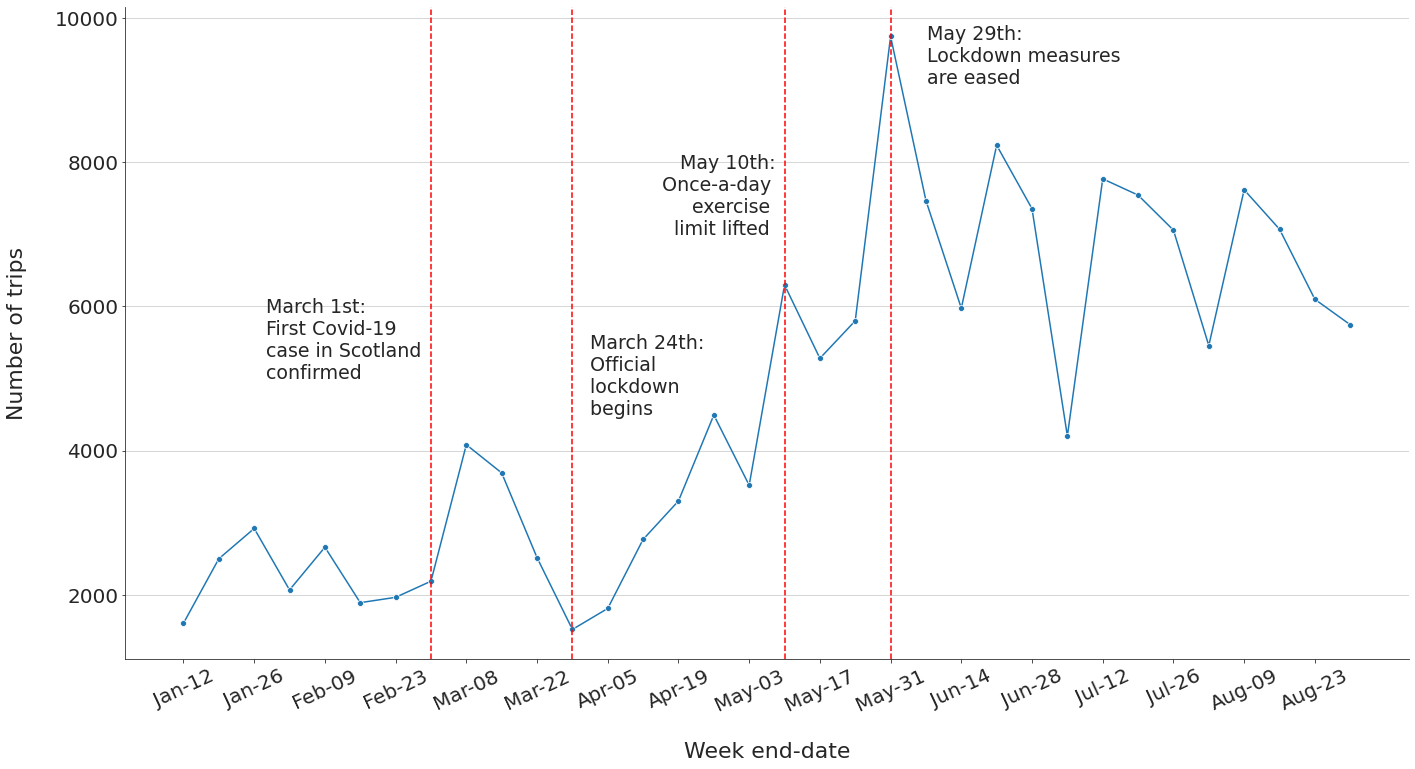

In [22]:
labels2 = ['01\nJan', '02', '03', '04\nFeb', '05', '06', '07', '08\nMar', '09', '10', 
          '11', '12', '13\nApr', '14', '15', '16', '17\nMay','18', '19', '20', '21',  
          '22\nJun', '23', '24', '25', '26\nJul', '27', '28', '29', '30\nAug', '31', '32', 
          '33', '34']

plt.figure(figsize=(23,12))
sns.set_style("whitegrid")
sns.set_style("ticks")
graph = sns.lineplot(data1_2_weekly_sums['week_enddate'], data1_2_weekly_sums['num_of_trips'], marker='o')
sns.despine()

plt.grid(axis='y')
plt.axvline('Mar-01', ls='--', c='r')
plt.text('Jan-26', 5000, "  March 1st: \n  First Covid-19 \n  case in Scotland \n  confirmed", fontsize=19)
#plt.text('Mar', new_mean_num_of_trips_perstation_19_20, '%.3f'%(new_mean_num_of_trips_perstation_19_20), fontsize=10, va='center', ha='center', backgroundcolor='w'
plt.axvline('Mar-29', ls='--', c='r')
#plt.text('Mar-08', 4500, "   March 24th: \n        Official \n        lockdown \n        begins", fontsize=16)
plt.text('Mar-29', 4500, "   March 24th: \n   Official \n   lockdown \n   begins", fontsize=19)
plt.axvline('May-10', ls='--', c='r')
plt.text('Apr-05', 7000, "            May 10th: \n         Once-a-day \n              exercise \n           limit lifted", fontsize=19)
plt.axvline('May-31', ls='--', c='r')
plt.text('May-31', 9100, "      May 29th: \n      Lockdown measures\n      are eased", fontsize=19)
#plt.title('\n' + "Total number of trips per week from January 2020 to August 2020" + '\n', fontsize =25)
plt.ylabel("Number of trips" + "\n", fontsize=22)
#plt.xlabel("\n" + "Week end-date", fontsize=22)
plt.xlabel("\n" + "Week end-date", fontsize=22)
plt.xticks(fontsize= 20, rotation=25)
plt.yticks(fontsize = 20)
graph.set_xticks(np.arange(0, length_data, 2))
#graph.set_xticks(np.arange(1, length_data, 2), minor=True)
#graph.set_xticklabels(labels2)
#plt.ylim(0,10000)
#graph.tick_params(which='both', direction='out', length=6)

graph.figure.savefig('fds-fig1.pdf')  
plt.show()


In [23]:
# Number of stations in use each week.
unique_stations_weekly = []
d1_weekly_stations = nfull_data[(nfull_data['started_at'] >= '2019-03-01 00:00:00') & (nfull_data['ended_at'] < '2021-03-01 00:00:00')]
d1_weekly_stations = d1_weekly_stations.iloc[:, [0,3,8]]
#d1_weekly_stations['helper_date'] = d1_weekly_stations['started_at'].dt.strftime('%b-%y') 
d1_weekly_stations['started_at'] = d1_weekly_stations['started_at'].dt.strftime('%W-%Y')
weeks = d1_weekly_stations['started_at'].unique()
def get_num_of_stations_weekly(week):
    stations = d1_weekly_stations[(d1_weekly_stations['started_at'] == week)]
    all_stations = pd.concat([stations['start_station_id'], stations['end_station_id']])
    unique_stations_weekly.append(all_stations.nunique())
    
for i in range(len(weeks)):
    get_num_of_stations_weekly(weeks[i])
    
#print(weeks)    
#print(unique_stations_weekly)
d1_weekly_stations


,started_at,start_station_id,end_station_id
22712,08-2019,248,359
22713,08-2019,275,346
22714,08-2019,275,346
22715,08-2019,289,183
22716,08-2019,260,366
...,...,...,...
371635,08-2021,1728,250
371636,08-2021,1728,250
371637,08-2021,259,1039
371638,08-2021,1092,1753


In [24]:
len(weeks)

107

In [25]:
#plt.figure(figsize=(28,15))
#sns.set_style("whitegrid")
#g=sns.lineplot(weeks, unique_stations_weekly)
#sns.despine()
#plt.grid(axis='y')
#plt.title('\n' + "Number of unique stations used each week" + '\n', fontsize =27)
#plt.ylabel("Number of unique stations" + "\n", fontsize=25)
#plt.xlabel("\n" + "Date", fontsize=25)
#plt.xticks(fontsize= 22)
#plt.yticks(fontsize = 22)
#g.set_xticks(np.arange(0, len(weeks), 26.5)) # <--- set the ticks first
#g.set_xticklabels(['Mar-19', 'Sep-19', 'Mar-20', 'Sep-20', 'Mar-21'])
#plt.show()

In [26]:
# Number of stations in use each month.
unique_stations = []
#d1_monthly_stations = nfull_data[(nfull_data['started_at'] >= '2019-03-01 00:00:00') & (nfull_data['started_at'] < '2021-03-01 00:00:00')]
#d1_monthly_stations = d1_monthly_stations.iloc[:, [0,3,8]]
d1_monthly_stations = nfull_data.iloc[:, [0,3,8]]
d1_monthly_stations['started_at'] = d1_monthly_stations['started_at'].dt.strftime('%b-%y')
months = d1_monthly_stations['started_at'].unique()
def get_num_of_stations(month):
    stations = d1_monthly_stations[(d1_monthly_stations['started_at'] == month)]
    all_stations = pd.concat([stations['start_station_id'], stations['end_station_id']])
    unique_stations.append(all_stations.nunique())
    
for i in range(len(months)):
    get_num_of_stations(months[i])
    

In [27]:
unique_stations_df = pd.DataFrame({'month': months, 'unique_stations_used': unique_stations})
unique_stations_weekly_df = pd.DataFrame({'week': weeks, 'unique_stations_used': unique_stations_weekly})
unique_stations_weekly_df_19_20 = unique_stations_weekly_df.iloc[:54, :]
unique_stations_weekly_df_20_21 = unique_stations_weekly_df.iloc[54:, :]
unique_stations_weekly_df_20_21.reset_index(drop=True, inplace=True)
#unique_stations_weekly_df_20_21

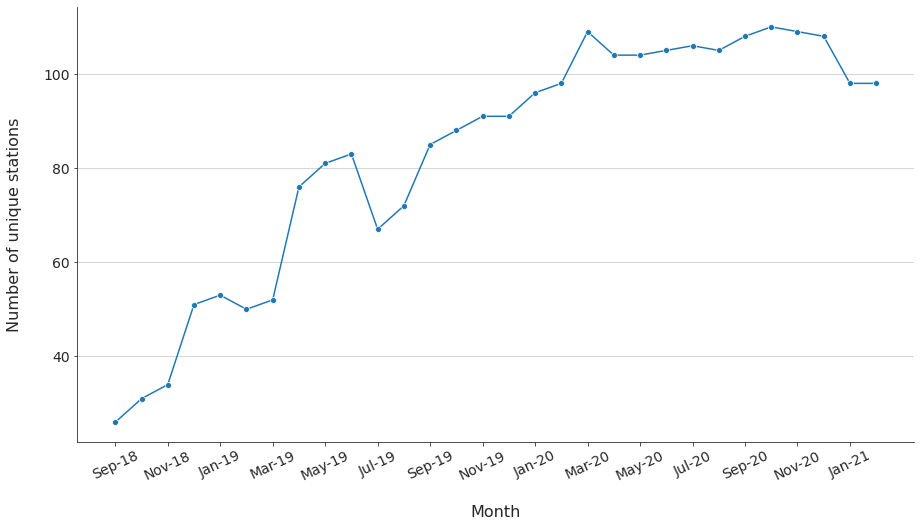

In [28]:
from matplotlib.ticker import Locator

plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_style("ticks") # {"xtick.major.size": 8, 'xtick.minor.size': 5})
graph2 = sns.lineplot(months, unique_stations, marker='o')
sns.despine()
plt.grid(axis='y')
#plt.title('\n' + "Number of unique stations used each month" + '\n', fontsize =20)
plt.ylabel("Number of unique stations" + "\n", fontsize=16)
plt.xlabel("\n" + "Month", fontsize=16)
plt.xticks(fontsize= 14, rotation = 25)
plt.yticks(fontsize = 14)
graph2.set_xticks(np.arange(0, len(months), 2))
#graph2.set_xticks(np.arange(0, len(months), 2), minor=True)
#minorLocator = AutoMinorLocator()
#graph2.tick_params(which="both", bottom=True)
plt.show()

In [29]:
data2_1 = nfull_data.iloc[:,[0,1]]
data2_1 = data2_1.groupby(pd.Grouper(key="started_at", freq = 'M')).count()
data2_1 = data2_1.reset_index()
#data2_1 = data2_1.iloc[1:, :]
data2_1['started_at'] = data2_1['started_at'].dt.strftime('%b-%y')
data2_1 = data2_1.rename({'started_at': 'month', 'ended_at': 'num_of_trips'}, axis='columns')
data2_1
data2_1_comb = pd.merge(data2_1, unique_stations_df, how='inner', on='month')
data2_1_comb

,month,num_of_trips,unique_stations_used
0,Sep-18,2226,26
1,Oct-18,3799,31
2,Nov-18,4047,34
3,Dec-18,3662,51
4,Jan-19,4750,53
5,Feb-19,4222,50
6,Mar-19,5889,52
7,Apr-19,8176,76
8,May-19,14160,81
9,Jun-19,10214,83


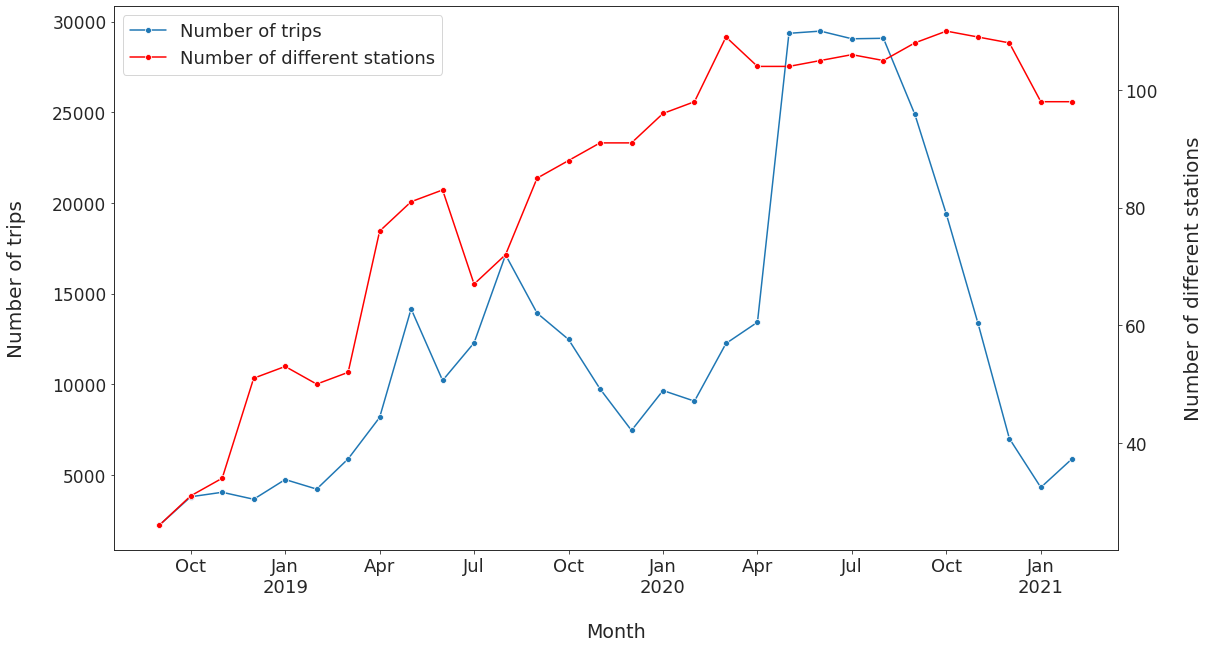

In [30]:
fig, ax1 = plt.subplots(figsize=(18,10))
sns.set_style("whitegrid")
sns.set_style("ticks")

#ax1.set_title('', fontsize=22)
ax1.set_xlabel('\nMonth', fontsize=19)
ax1.set_ylabel('Number of trips\n', fontsize=20)
ax1 = sns.lineplot(data2_1_comb['month'], data2_1_comb['num_of_trips'], label='Number of trips', marker='o')
ax1.tick_params(axis='y', labelsize = 17)
ax1.get_legend().remove()
ax2 = ax1.twinx()

ax2.set_ylabel('\nNumber of different stations', fontsize=20)
ax2 = sns.lineplot(data2_1_comb['month'], data2_1_comb['unique_stations_used'], color='r', label='Number of different stations', marker='o')
ax2.tick_params(axis='y', labelsize = 17)

ax1.set_xticks(np.arange(1, 30, 3)) # <--- set the ticks first
ax1.set_xticklabels(['Oct', 'Jan\n2019', 'Apr', 'Jul', 'Oct', 'Jan\n2020', 'Apr', 'Jul', 'Oct', 'Jan\n2021'], fontsize=18)

line, label = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
plt.legend(line + line2, label + label2, loc=0, fontsize=18)

#ax1.grid(axis='x')
ax2.figure.savefig('fds-fig2.pdf')

plt.show()

In [31]:
#We compare the first 27 full weeks from March 24th, so we won't include Sep 30th 2019.
d2_Mar19_Sep19 = nfull_data[(nfull_data['started_at'] >= '2019-03-24 00:00:00') & (nfull_data['started_at'] < '2019-09-30 00:00:00')]
d2_Mar19_Sep19 = d2_Mar19_Sep19.reset_index(drop=True)
d2_Mar19_Sep19_trip_count = d2_Mar19_Sep19.iloc[:, [0,1]]

d2_Mar19_Sep19_trip_count

,started_at,ended_at
0,2019-03-24 00:33:29.383000+00:00,2019-03-24 00:57:42.873000+00:00
1,2019-03-24 00:35:41.871000+00:00,2019-03-24 01:09:39.524000+00:00
2,2019-03-24 00:36:37.630000+00:00,2019-03-24 00:48:51.270000+00:00
3,2019-03-24 00:47:26.353000+00:00,2019-03-24 00:57:06.795000+00:00
4,2019-03-24 01:02:24.378000+00:00,2019-03-24 01:14:51.638000+00:00
...,...,...
77823,2019-09-29 22:43:48.044000+00:00,2019-09-29 22:56:19.510000+00:00
77824,2019-09-29 23:20:10.832000+00:00,2019-09-29 23:29:25.645000+00:00
77825,2019-09-29 23:20:32.313000+00:00,2019-09-29 23:39:33.731000+00:00
77826,2019-09-29 23:23:59.389000+00:00,2019-09-29 23:39:37.784000+00:00


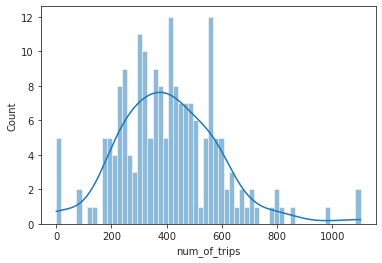

In [32]:
# Distribution of trips for pre-lockdown period
d2_Mar19_Sep19_trip_count_per_day =  d2_Mar19_Sep19_trip_count.groupby(pd.Grouper(key="started_at", freq = 'D')).count()
d2_Mar19_Sep19_trip_count_per_day = d2_Mar19_Sep19_trip_count_per_day.reset_index()
d2_Mar19_Sep19_trip_count_per_day = d2_Mar19_Sep19_trip_count_per_day.rename({'started_at':'day', 'ended_at': 'num_of_trips'}, axis='columns')
#d2_Mar20_Feb21_trip_count_per_day
sns.histplot(data=d2_Mar19_Sep19_trip_count_per_day, x='num_of_trips', bins=60, kde=True)

In [33]:
d2_Mar19_Sep19_trip_count_g = d2_Mar19_Sep19_trip_count.groupby(pd.Grouper(key="started_at", freq = 'W')).count()
d2_Mar19_Sep19_trip_count_g = d2_Mar19_Sep19_trip_count_g.reset_index()
d2_Mar19_Sep19_trip_count_g['started_at'] = d2_Mar19_Sep19_trip_count_g['started_at'].dt.strftime('%W')
d2_Mar19_Sep19_trip_count_g = d2_Mar19_Sep19_trip_count_g.rename({'started_at': 'week_enddate', 'ended_at': 'num_of_trips'}, axis='columns')
d2_Mar19_Sep19_trip_count_g['year'] = 'Pre-lockdown (2019)'

d2_Mar19_Sep19_trip_count_g['number_of_stations_used'] = unique_stations_weekly_df_19_20.iloc[:28, [1]]
#d2_Mar19_Feb20_trip_count_g['average number of trips per station'] = d2_Mar19_Feb20_trip_count_g['num_of_trips']/d2_Mar19_Feb20_trip_count_g['number_of_stations']

d2_Mar19_Sep19_trip_count_g = d2_Mar19_Sep19_trip_count_g.iloc[1:, :]
d2_Mar19_Sep19_trip_count_g = d2_Mar19_Sep19_trip_count_g.reset_index(drop=True)
d2_Mar19_Sep19_trip_count_g

,week_enddate,num_of_trips,year,number_of_stations_used
0,12,1741,Pre-lockdown (2019),49
1,13,1219,Pre-lockdown (2019),49
2,14,1738,Pre-lockdown (2019),50
3,15,2545,Pre-lockdown (2019),51
4,16,2424,Pre-lockdown (2019),51
5,17,2725,Pre-lockdown (2019),52
6,18,4981,Pre-lockdown (2019),51
7,19,3249,Pre-lockdown (2019),74
8,20,2560,Pre-lockdown (2019),81
9,21,1579,Pre-lockdown (2019),80


In [34]:
#We compare the first 27 full weeks from March 24th.
d2_Mar20_Sep20 = nfull_data[(nfull_data['started_at'] >= '2020-03-23 00:00:00') & (nfull_data['started_at'] < '2020-09-30 00:00:00')]
d2_Mar20_Sep20 = d2_Mar20_Sep20.reset_index(drop=True)
d2_Mar20_Sep20_trip_count = d2_Mar20_Sep20.iloc[:, [0,1]]

d2_Mar20_Sep20_trip_count

,started_at,ended_at
0,2020-03-23 00:25:17.139000+00:00,2020-03-23 00:56:39.006000+00:00
1,2020-03-23 00:43:28.494000+00:00,2020-03-23 02:01:49.377000+00:00
2,2020-03-23 01:28:03.856000+00:00,2020-03-23 02:19:28.658000+00:00
3,2020-03-23 01:28:08.767000+00:00,2020-03-23 02:20:36.416000+00:00
4,2020-03-23 01:33:53.710000+00:00,2020-03-23 02:19:11.166000+00:00
...,...,...
157027,2020-09-29 23:10:22.233000+00:00,2020-09-29 23:36:47.360000+00:00
157028,2020-09-29 23:10:28.262000+00:00,2020-09-29 23:36:42.130000+00:00
157029,2020-09-29 23:17:22.477000+00:00,2020-09-29 23:19:58.047000+00:00
157030,2020-09-29 23:22:16.667000+00:00,2020-09-29 23:42:07.883000+00:00


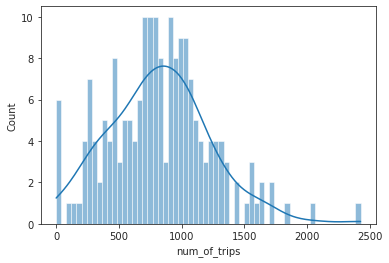

In [35]:
# Distribution of trips
d2_Mar20_Sep20_trip_count_per_day = d2_Mar20_Sep20_trip_count.groupby(pd.Grouper(key="started_at", freq = 'D')).count()
d2_Mar20_Sep20_trip_count_per_day = d2_Mar20_Sep20_trip_count_per_day.reset_index()
d2_Mar20_Sep20_trip_count_per_day = d2_Mar20_Sep20_trip_count_per_day.rename({'started_at':'day', 'ended_at': 'num_of_trips'}, axis='columns')
#d2_Mar20_Feb21_trip_count_per_day
sns.histplot(data=d2_Mar20_Sep20_trip_count_per_day, x='num_of_trips', bins=60, kde=True)

In [36]:
d2_Mar20_Sep20_trip_count_g = d2_Mar20_Sep20_trip_count.groupby(pd.Grouper(key="started_at", freq = 'W')).count()
d2_Mar20_Sep20_trip_count_g = d2_Mar20_Sep20_trip_count_g.reset_index()
d2_Mar20_Sep20_trip_count_g['started_at'] = d2_Mar20_Sep20_trip_count_g['started_at'].dt.strftime('%W')
d2_Mar20_Sep20_trip_count_g = d2_Mar20_Sep20_trip_count_g.rename({'started_at': 'week_enddate', 'ended_at': 'num_of_trips'}, axis='columns')
d2_Mar20_Sep20_trip_count_g['year'] = 'Lockdown (2020)'


#d2_Mar20_Feb21_trip_count_g['average number of trips per station'] = d2_Mar20_Feb21_trip_count_g['num_of_trips']/d2_Mar20_Feb21_trip_count_g['number_of_stations']

d2_Mar20_Sep20_trip_count_g = d2_Mar20_Sep20_trip_count_g.iloc[:27, :]
unique_stations_weekly_df_20 = unique_stations_weekly_df.iloc[57:84,:]
unique_stations_weekly_df_20 = unique_stations_weekly_df_20.reset_index(drop=True)
d2_Mar20_Sep20_trip_count_g['number_of_stations_used'] = unique_stations_weekly_df_20.iloc[:,[1]]
#d2_Mar20_Sep20_trip_count_g = d2_Mar20_Sep20_trip_count_g.reset_index(drop=True)
d2_Mar20_Sep20_trip_count_g

,week_enddate,num_of_trips,year,number_of_stations_used
0,12,1516,Lockdown (2020),103
1,13,1808,Lockdown (2020),102
2,14,2766,Lockdown (2020),102
3,15,3300,Lockdown (2020),100
4,16,4493,Lockdown (2020),104
5,17,3518,Lockdown (2020),102
6,18,6300,Lockdown (2020),104
7,19,5280,Lockdown (2020),103
8,20,5801,Lockdown (2020),103
9,21,9749,Lockdown (2020),103


In [37]:
num_of_trips_comb = pd.concat([d2_Mar19_Sep19_trip_count_g, d2_Mar20_Sep20_trip_count_g], axis=0, ignore_index=True)
num_of_trips_comb['bin_year'] = np.where(num_of_trips_comb['year'] == 'Lockdown (2020)', 1, 0)
num_of_trips_comb   

,week_enddate,num_of_trips,year,number_of_stations_used,bin_year
0,12,1741,Pre-lockdown (2019),49,0
1,13,1219,Pre-lockdown (2019),49,0
2,14,1738,Pre-lockdown (2019),50,0
3,15,2545,Pre-lockdown (2019),51,0
4,16,2424,Pre-lockdown (2019),51,0
5,17,2725,Pre-lockdown (2019),52,0
6,18,4981,Pre-lockdown (2019),51,0
7,19,3249,Pre-lockdown (2019),74,0
8,20,2560,Pre-lockdown (2019),81,0
9,21,1579,Pre-lockdown (2019),80,0


In [38]:
mean_num_of_trips_19 = d2_Mar19_Sep19_trip_count_g['num_of_trips'].mean()
mean_num_of_trips_20 = d2_Mar20_Sep20_trip_count_g['num_of_trips'].mean()

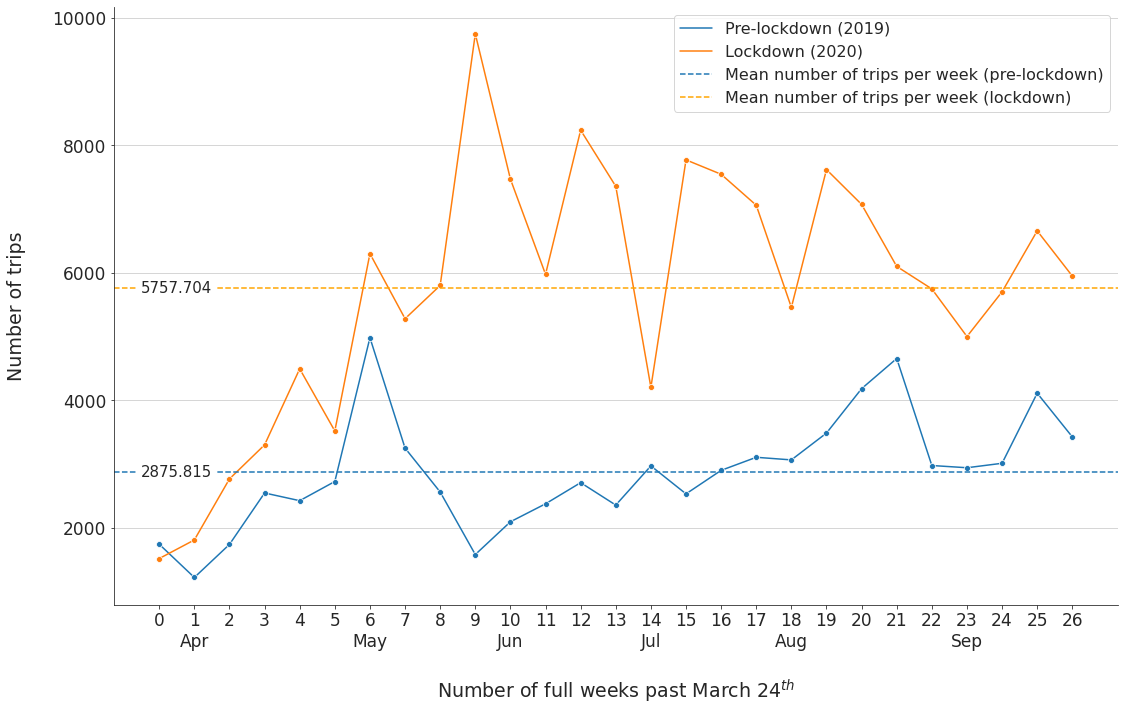

In [39]:
myLabels = ['0', '1\nApr', '2', '3', '4', '5', '6\nMay', '7', '8', '9', '10\nJun',
             '11', '12', '13', '14\nJul', '15', '16', '17', '18\nAug', '19', '20', '21',
             '22', '23\nSep', '24', '25', '26']

plt.figure(figsize=(18,11))
sns.set_style("whitegrid")
sns.set_style("ticks")
graph3=sns.lineplot(data=num_of_trips_comb, x='week_enddate', y="num_of_trips", hue="year", marker='o')
sns.despine()
plt.grid(axis='y')
plt.axhline(mean_num_of_trips_19, ls='--', label="Mean number of trips per week (pre-lockdown)")
plt.text(0.5, mean_num_of_trips_19, '%.3f'%(mean_num_of_trips_19), fontsize=15, va='center', ha='center', backgroundcolor='w')
plt.axhline(mean_num_of_trips_20, ls='--', c = 'orange', label="Mean number of trips per week (lockdown)")
plt.text(0.5, mean_num_of_trips_20, '%.3f'%(mean_num_of_trips_20), fontsize=15, va='center', ha='center', backgroundcolor='w')

#plt.title('\n' + "Total number of trips per week" + '\n', fontsize =20)
plt.ylabel("Number of trips" + "\n", fontsize=19)
plt.xlabel("\n" + r"Number of full weeks past March $24^{th}$", fontsize=19)
plt.xticks(fontsize= 17)

plt.yticks(fontsize = 17)
#g.set_xticks(np.arange(0, 30, 4)) # <--- set the ticks first
graph3.set_xticklabels(myLabels)
plt.legend(fontsize = 16)

graph3.figure.savefig('fds-fig3.pdf')
plt.show()

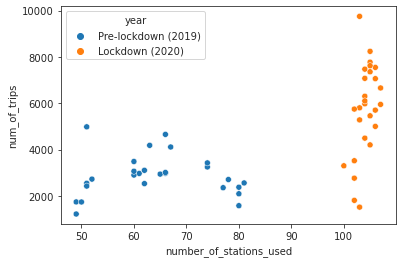

In [40]:
sns.scatterplot(data=num_of_trips_comb, hue='year', y='num_of_trips', x='number_of_stations_used')


In [41]:
model0 = smf.ols('num_of_trips ~ number_of_stations_used', data=num_of_trips_comb)
results0 = model0.fit()
results0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_of_trips   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     41.13
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.26e-08
Time:                        11:30:55   Log-Likelihood:                -473.52
No. Observations:                  54   AIC:                             951.0
Df Residuals:                      52   BIC:                             955.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1147.1779    878.873     -1.305      0.198   -2910.766     616.410
number_of_stations_used    64.8895     10.118      6.413      0.000      44.586      85.193
==============================================================================
Omnibus:                        1.533   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                          -0.145   Prob(JB):                        0.680
Kurtosis:                       3.508   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model00 = smf.ols('num_of_trips ~ bin_year', data=num_of_trips_comb)
results00 = model00.fit()
results00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_of_trips   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     47.77
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           6.84e-09
Time:                        11:30:55   Log-Likelihood:                -471.66
No. Observations:                  54   AIC:                             947.3
Df Residuals:                      52   BIC:                             951.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2875.8148    294.830      9.754      0.000    2284.194    3467.435
bin_year    2881.8889    416.953      6.912      0.000    2045.211    3718.567
==============================================================================
Omnibus:                        4.694   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.001
Skew:                          -0.406   Prob(JB):                        0.135
Kurtosis:                       4.058   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model = smf.ols('num_of_trips ~ number_of_stations_used + bin_year', data=num_of_trips_comb)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_of_trips   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     23.66
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           5.39e-08
Time:                        11:30:55   Log-Likelihood:                -471.53
No. Observations:                  54   AIC:                             949.1
Df Residuals:                      51   BIC:                             955.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2003.0899   1811.318      1.106      0.274   -1633.283    5639.462
number_of_stations_used    13.5813     27.806      0.488      0.627     -42.242      69.404
bin_year                 2340.1455   1186.026      1.973      0.054     -40.902    4721.193
==============================================================================
Omnibus:                        4.402   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.727
Skew:                          -0.371   Prob(JB):                        0.155
Kurtosis:                       4.051   Cond. No.                         873.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
MSE = results.mse_resid
RMSE = np.sqrt(MSE)
print('Mean Squared Error:', MSE)  
print('Root Mean Squared Error:', RMSE)

Mean Squared Error: 2381853.065434835
Root Mean Squared Error: 1543.325327153946


In [45]:
num_of_trips_19 = d2_Mar19_Sep19_trip_count_g['num_of_trips']
num_of_trips_20 = d2_Mar20_Sep20_trip_count_g['num_of_trips']

[2046.537, 3652.005] 404.7577325306688 0.0


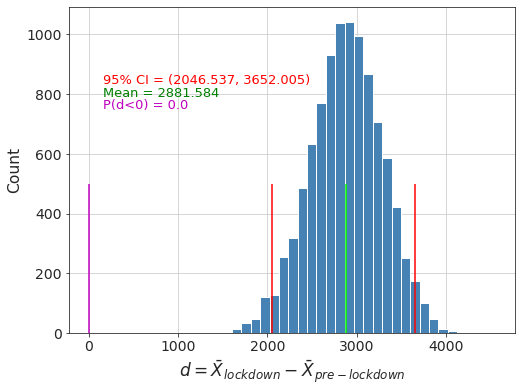

In [46]:
def bootstrap(n, df1, df2, k=10000, quantiles=[0.025, 0.975]):
    #n = len(x)
    
    diffs = np.zeros(k)
    for i in range(k):
        x_star_pre_pandemic = df1.sample(n, replace=True)
        x_star_pandemic = df2.sample(n, replace=True)
        diffs[i] = x_star_pandemic.mean() - x_star_pre_pandemic.mean() 
        
    ci = []
    #np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
    ci_ = np.around(np.quantile(diffs, quantiles), decimals = 3)
    ci.append(ci_[0])
    ci.append(ci_[1])
    mean = np.around(np.mean(diffs), decimals=3)
    std = np.std(diffs)
    prob = np.around(scipy.stats.norm(mean, std).cdf(0), decimals=6)
    
    
    plt.figure(figsize=(8,6))
    plt.hist(diffs, 30, color = 'steelblue')
    plt.grid(b=None)
    plt.vlines(ci[0], ymin=0, ymax=500, color='r')
    plt.vlines(ci[1], ymin=0, ymax=500, color='r')
    plt.vlines(0, ymin=0, ymax=500, color='m')
    plt.vlines(mean, ymin=0, ymax=500, color='lime')
    plt.text(160, 835,'95% CI = (%ci0, %ci1)'.replace('%ci0', str(ci[0])).replace('%ci1', str(ci[1])), fontsize=13, color='red')
    plt.text(160, 790,'Mean = %W'.replace('%W', str(mean)), fontsize=13, color='green')
    plt.text(160, 750,'P(d<0) = %W'.replace('%W', str(prob)), fontsize=13, color='m')
    #plt.title('\n' + "n = %W".replace('%W', str(n)) + '\n', fontsize =17)
    plt.ylabel("Count" , fontsize=15.5)
    plt.xlabel(r'$d = \bar X_{lockdown} - \bar X_{pre-lockdown}$', fontsize=17)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    #graph4.figure.savefig('fds-bootstrap.pdf')
    
    return(ci, std, prob)

ci, std, prob = bootstrap(27, num_of_trips_19, num_of_trips_20)
print(ci, std, prob)

In [47]:
data3 = nfull_data.iloc[:, [0,1]]
data3_1 = nfull_data.iloc[:,[0,3,8]]
#data3_1['started_at'] = data3_1['started_at'].dt.strftime('%Y-%m-%d')
data3 = data3.rename({'ended_at': 'num_of_trips'}, axis='columns')
data3

,started_at,num_of_trips
0,2018-09-15 08:52:05.960000+00:00,2018-09-15 09:11:48.464000+00:00
1,2018-09-15 09:24:33.571000+00:00,2018-09-15 09:41:09.005000+00:00
2,2018-09-15 09:48:54.291000+00:00,2018-09-15 10:46:40.575000+00:00
3,2018-09-16 12:01:36.111000+00:00,2018-09-16 12:25:26.687000+00:00
4,2018-09-16 12:03:43.982000+00:00,2018-09-16 12:11:16.570000+00:00
...,...,...
371635,2021-02-27 22:45:51.751000+00:00,2021-02-27 23:11:52.368000+00:00
371636,2021-02-27 22:45:52.415000+00:00,2021-02-27 23:11:19.161000+00:00
371637,2021-02-27 22:58:22.423000+00:00,2021-02-27 23:07:29.297000+00:00
371638,2021-02-27 23:04:23.587000+00:00,2021-02-27 23:15:40.401000+00:00


In [48]:
data3_prelockdown = data3[(data3['started_at'] >= '2019-03-01 00:00:00') & (data3['started_at'] < '2019-10-01 00:00:00')]
data3_lockdown = data3[(data3['started_at'] >= '2020-03-01 00:00:00') & (data3['started_at'] < '2020-10-01 00:00:00')]
data3_prelockdown_g = data3_prelockdown.groupby(pd.Grouper(key="started_at", freq = 'D')).count().reset_index()
data3_lockdown_g = data3_lockdown.groupby(pd.Grouper(key="started_at", freq = 'D')).count().reset_index()
data3_prelockdown_g['time period'] = 'Pre-lockdown'
data3_lockdown_g['time period'] = 'Lockdown'
data3_combined = pd.concat([data3_prelockdown_g, data3_lockdown_g], axis=0, ignore_index=True)
#data3_combined['started_at'] = data3_combined['started_at'].dt.strftime('%d-%b-%y')
data3_combined['dayofweek_startedat'] =  data3_combined['started_at'].dt.day_name()
data3_combined['started_at'] = data3_combined['started_at'].dt.strftime('%d-%b-%y')
data3_combined = data3_combined.rename({'started_at': 'day'}, axis='columns')
data3_combined

,day,num_of_trips,time period,dayofweek_startedat
0,01-Mar-19,196,Pre-lockdown,Friday
1,02-Mar-19,150,Pre-lockdown,Saturday
2,03-Mar-19,176,Pre-lockdown,Sunday
3,04-Mar-19,197,Pre-lockdown,Monday
4,05-Mar-19,160,Pre-lockdown,Tuesday
...,...,...,...,...
421,25-Sep-20,808,Lockdown,Friday
422,26-Sep-20,993,Lockdown,Saturday
423,27-Sep-20,1098,Lockdown,Sunday
424,28-Sep-20,690,Lockdown,Monday


In [49]:
# Number of stations in use each day.
unique_stations_perday = []
d1_daily_stations = data3_1[(data3_1['started_at'] >= '2019-03-01 00:00:00') & (data3_1['started_at'] <= '2021-02-28 00:00:00')]
#d1_daily_stations_2 = nfull_data[(nfull_data['started_at'] >= '2020-03-01 00:00:00') & (nfull_data['started_at'] <= '2021-02-28 00:00:00')]
#d1_daily_stations = pd.concat([d1_daily_stations_1, d1_daily_stations_2], axis=0, ignore_index=True)
#d1_daily_stations = d1_daily_stations.iloc[:, [0,3,8]]
d1_daily_stations['started_at'] = d1_daily_stations['started_at'].dt.strftime('%d-%b-%y')
days = d1_daily_stations['started_at'].unique()
def get_num_of_stations_perday(day):
    stations = d1_daily_stations[(d1_daily_stations['started_at'] == day)]
    all_stations = pd.concat([stations['start_station_id'], stations['end_station_id']])
    unique_stations_perday.append(all_stations.nunique())
    
for i in range(len(days)):
    get_num_of_stations_perday(days[i])
    

unique_stations_df_perday = pd.DataFrame({'day': days, 'unique_stations_used': unique_stations_perday})
unique_stations_df_perday


,day,unique_stations_used
0,01-Mar-19,46
1,02-Mar-19,46
2,03-Mar-19,42
3,04-Mar-19,49
4,05-Mar-19,45
...,...,...
703,23-Feb-21,62
704,24-Feb-21,80
705,25-Feb-21,81
706,26-Feb-21,82


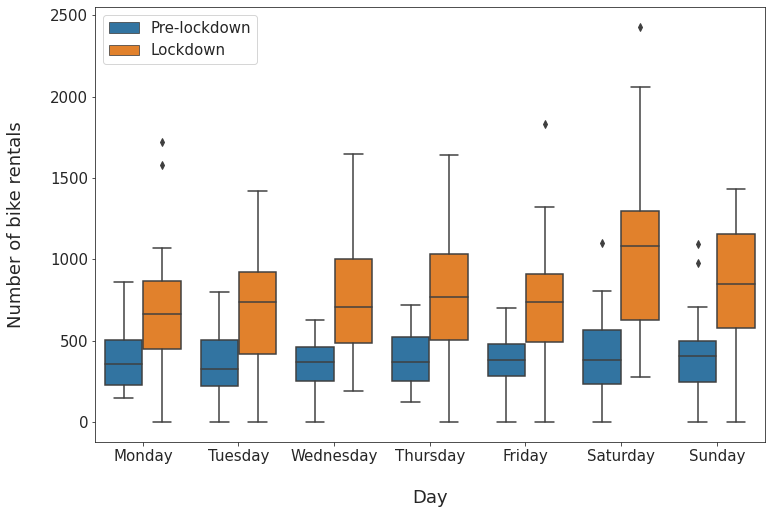

In [50]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12,8))
#sns.set_style("whitegrid")
graph5 = sns.boxplot(x="dayofweek_startedat", y="num_of_trips", data=data3_combined, order = days_of_week, hue = "time period")

#plt.title('\n' + "Number of bike rentals per day of the week" + '\n', fontsize =20)
plt.ylabel("Number of bike rentals" + "\n", fontsize=18)
plt.xlabel("\n" + "Day", fontsize=18)
plt.xticks(fontsize= 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

graph5.figure.savefig('fds-fig5.pdf')

plt.show()

In [51]:
data3_combined.groupby(['dayofweek_startedat', 'time period'])['num_of_trips'].describe()

count         mean         std    min  \
dayofweek_startedat time period                                           
Friday              Lockdown       30.0   738.500000  383.398213    0.0   
                    Pre-lockdown   31.0   382.387097  166.279619    0.0   
Monday              Lockdown       31.0   681.935484  371.172102    0.0   
                    Pre-lockdown   30.0   396.133333  188.662394  149.0   
Saturday            Lockdown       30.0  1046.766667  510.252181  280.0   
                    Pre-lockdown   31.0   398.193548  244.764842    0.0   
Sunday              Lockdown       31.0   850.322581  360.324519    0.0   
                    Pre-lockdown   31.0   403.774194  236.615822    0.0   
Thursday            Lockdown       30.0   772.266667  399.408263    0.0   
                    Pre-lockdown   30.0   386.366667  159.862545  124.0   
Tuesday             Lockdown       31.0   676.451613  345.101419    0.0   
                    Pre-lockdown   30.0   361.600000  174.216789    0.0   
Wednesday           Lockdown       30.0   744.700000  366.136695  190.0   
                    Pre-lockdown   30.0   358.566667  149.786442    0.0   

                                     25%     50%      75%     max  
dayofweek_startedat time period                                    
Friday              Lockdown      495.75   739.0   909.00  1832.0  
                    Pre-lockdown  286.50   382.0   478.50   704.0  
Monday              Lockdown      449.00   665.0   867.50  1721.0  
                    Pre-lockdown  228.00   357.0   502.00   862.0  
Saturday            Lockdown      630.50  1079.5  1299.75  2428.0  
                    Pre-lockdown  236.50   382.0   567.00  1102.0  
Sunday              Lockdown      576.50   846.0  1156.00  1435.0  
                    Pre-lockdown  247.00   405.0   497.00  1096.0  
Thursday            Lockdown      506.00   767.5  1032.75  1644.0  
                    Pre-lockdown  250.25   370.0   525.25   718.0  
Tuesday             Lockdown      422.00   737.0   923.50  1422.0  
                    Pre-lockdown  224.50   327.0   504.00   801.0  
Wednesday           Lockdown      485.75   708.5  1001.00  1646.0  
                    Pre-lockdown  254.25   369.0   459.75   629.0

More days of the week for the Lockdown period have outliers liying beyond the upper whisker of the data(?) than for the Pre-lockdown period as it was expected from the probability distributions of the two populations. As we have seen, both populations are positively skewed, but the Lockdown population is more positively skewed.